In [382]:
import skgstat as skg
import math
import itertools
import json
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.rk import Krige
from pykrige.compat import GridSearchCV
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors


In [3]:
# parser function
def parser(fname):
    f = open(fname, "r")
    readings = []
    f.readline()
    f.readline()
    for line in f:
        temp = line.strip("\n").split()
        temp2 = [temp[0], int(temp[1]), float(temp[2]), float(temp[3]), float(temp[4]), float(temp[5]), float(temp[6])]
        readings.append(temp2)
    f.close()
    return readings

In [4]:
# parser function
def parser_log(fname):
    f = open(fname, "r")
    readings = []
    
    for line in f:
        temp = line.strip("\n").split(",")
                #datetime,lat,long,alt,vel_x,vel_y,vel_z,acc_x,elevation,
                    #source,location,vehicle,device,freq,sig_strength,sig_strength_Dbm
        temp2 = [temp[0], float(temp[1]), float(temp[2]), float(temp[3]), float(temp[4]), float(temp[5]), float(temp[6]), temp[7], float(temp[8]),
                    int(temp[9]), int(temp[10]), int(temp[11]), int(temp[12]), float(temp[13]), float(temp[14]), float(temp[15])]
        readings.append(temp2)
    f.close()
    return readings

In [7]:
def extract(arr, ind):
    temp = []
    for i in arr:
        temp.append(i[ind])
        
    return temp

In [8]:
# populate data

# ID, Loop#, Timestamp, Freq, Lat, Long, RF reading
readings = parser_log("../data/channel14_470mhz.log")


In [9]:
#lats = np.array(extract(readings,4))
#long = np.array(extract(readings,5))
#rf_freqs = np.array(extract(readings,6))
lats = extract(readings,1)
long = extract(readings, 2)
alt = extract(readings, 3)
rf_freqs = extract(readings, 15)

In [139]:
minlat = min(lats)
maxlat = max(lats)
minlong = min(long)#-116.65
maxlong = max(long)
buff = 0.001
lat_arr = np.arange(minlat-buff,maxlat+buff,abs((minlat-buff)-(maxlat+buff))/30.)
long_arr =np.arange(minlong-buff,maxlong+buff,abs((minlong-buff)-(maxlong+buff))/30.)

In [140]:
print(maxlong)
print(max(long_arr))

-116.63458025694369
-116.63466974186241


In [141]:
#actually generate mesh points for the grid
lat_mesh, long_mesh = np.meshgrid(lat_arr, long_arr)
#lat_mesh = lat_mesh.tolist()
#long_mesh = long_mesh.tolist()

In [142]:
lat_mesh_flat = list(lat_mesh.flatten())
long_mesh_flat = list(long_mesh.flatten())

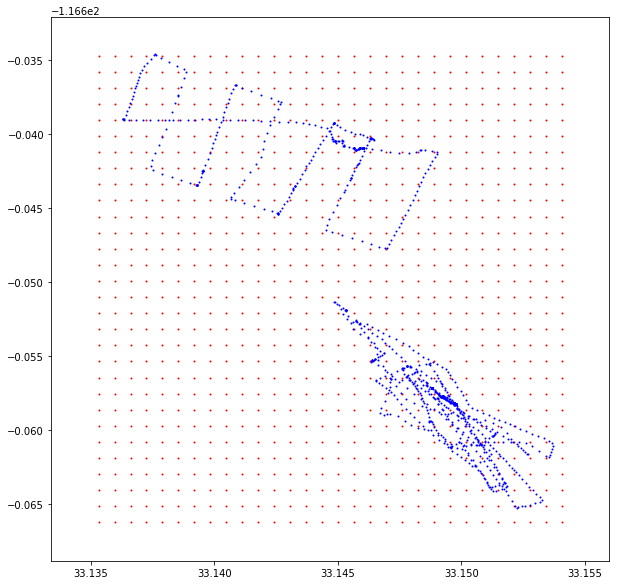

In [163]:
meshdata = plt.figure(figsize=(10,10))  # create a figure object
mesh_ax = meshdata.add_subplot(1, 1, 1)  # create an axes object in the figure
#ax.contour(lat_mesh, long_mesh, z.data, 10)
mesh_ax.scatter(lat_mesh_flat,long_mesh_flat, s=1, color="red")
mesh_ax.scatter(lats,long, s=1, color="blue")

#### write est points to json

In [471]:
print(type(lat_mesh_flat))
print(type(long_mesh_flat))
print(type(ss.data.tolist()))
print(type(z.data.tolist()))
dumpdict = {"lats":list(lat_mesh_flat),"long":list(long_mesh_flat),"zdata":z.data.tolist(),"ss":ss.data.tolist()}



<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [472]:
with open("zdata.json", "w") as write_file:
    json.dump(dumpdict, write_file)
    
    

In [451]:
print(type(ss))
ss

<class 'numpy.ma.core.MaskedArray'>


masked_array(
  data=[[8.977840425636197, 8.948180212062281, 8.91526751604966, ...,
         5.391835804742689, 5.5283225717877, 5.758256548742345],
        [8.977840425636197, 8.948180212062281, 8.91526751604966, ...,
         5.391835804742689, 5.5283225717877, 5.758256548742345],
        [8.977840425636197, 8.948180212062281, 8.91526751604966, ...,
         5.391835804742689, 5.5283225717877, 5.758256548742345],
        ...,
        [4.88558897165066, 4.265935378976997, 3.571613131682978, ...,
         8.5989495720166, 8.656641079159083, 8.709150446711277],
        [4.88558897165066, 4.265935378976997, 3.571613131682978, ...,
         8.5989495720166, 8.656641079159083, 8.709150446711277],
        [4.88558897165066, 4.265935378976997, 3.571613131682978, ...,
         8.5989495720166, 8.656641079159083, 8.709150446711277]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False,

In [452]:
z1

masked_array(
  data=[[-64.98515604766112, -65.01768235229741, -65.05323013221042, ...,
         -66.47001552572125, -66.38040026629847, -66.25830134141988],
        [-64.98515604766112, -65.01768235229741, -65.05323013221042, ...,
         -66.47001552572125, -66.38040026629847, -66.25830134141988],
        [-64.98515604766112, -65.01768235229741, -65.05323013221042, ...,
         -66.47001552572125, -66.38040026629847, -66.25830134141988],
        ...,
        [-63.7152714985004, -63.638120755104325, -63.562447651246025,
         ..., -64.6536754457298, -64.66711732367052, -64.67790002131905],
        [-63.7152714985004, -63.638120755104325, -63.562447651246025,
         ..., -64.6536754457298, -64.66711732367052, -64.67790002131905],
        [-63.7152714985004, -63.638120755104325, -63.562447651246025,
         ..., -64.6536754457298, -64.66711732367052, -64.67790002131905]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, Fa

In [85]:
print(min(lat_mesh_flat))
print(max(lat_mesh_flat))
print(min(long_mesh_flat))
print(max(long_mesh_flat))

33.13632002256799
33.1536957819689
-116.66526480450865
-116.6356030751958


In [170]:
print(min(lats))
print(max(lats))
print(min(long))
print(max(long))
print(max(lats)-min(lats))
print(max(long)-min(long))

33.13632002256799
33.153695781968864
-116.66526480450865
-116.63458025694369
0.01737575940087055
0.03068454756495953


In [236]:
def exponential_variogram_model(m, d):
    """Exponential model, m is [psill, range, nugget]"""
    psill = float(m[0])
    range_ = float(m[1])
    nugget = float(m[2])
    temp = psill * (1. - np.exp(-d/(range_/3.))) + nugget
    blopop.append(temp)
    return temp

In [ ]:
def spherical_variogram_model(m, d):
    """Spherical model, m is [psill, range, nugget]"""
    psill = float(m[0])
    range_ = float(m[1])
    nugget = float(m[2])
    return np.piecewise(d, [d <= range_, d > range_],
                        [lambda x: psill * ((3.*x)/(2.*range_) - (x**3.)/(2.*range_**3.)) + nugget, psill + nugget])



In [379]:
def wave_variogram_model(m, d):
    """Wave model, m is [psill, range, nugget]"""
    psill = float(m[0])
    range_ = float(m[1])
    nugget = float(m[2])
    #wave intensity
    w = 0.003
    temp = (psill * (1. - (w*(np.sin(d/w)/d)))) + nugget
    #temp = np.piecewise(d, d>0,
                        #[lambda x: psill * (1. - (w*(np.sin(d/w)/d))) + nugget, 0])

    slopop.append(temp)
    dws.append(d/w)
    return temp

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'exponential' Variogram Model
Partial Sill: 6.5
Full Sill: 8.0
Range: 0.015
Nugget: 1.5 



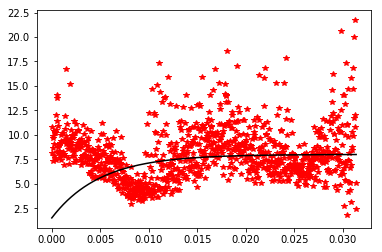

Calculating statistics on variogram model fit...


In [473]:
# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.

#example:
# OK = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], 
            #variogram_model='linear', verbose=False, enable_plotting=False)

slopop = []
dws=[]
#psill, range, nugget [-2,0.9,9]
vparams = [8,0.015,1.5]
abs_rf_freqs = [abs(x) for x in rf_freqs]
OK = OrdinaryKriging(lats, long, abs_rf_freqs, variogram_model='exponential', nlags = 1000, 
                     variogram_parameters=vparams, variogram_function=wave_variogram_model,
                     verbose=True, enable_plotting=True, coordinates_type='geographic')
#z_abs, ss_abs = OK.execute('grid', lat_mesh_flat, long_mesh_flat)

In [435]:
OK.lags

array([0.0015161 , 0.00448416, 0.00750471, 0.01112586, 0.01433863,
       0.01725061, 0.02023851, 0.02324754, 0.02626241, 0.02924118])

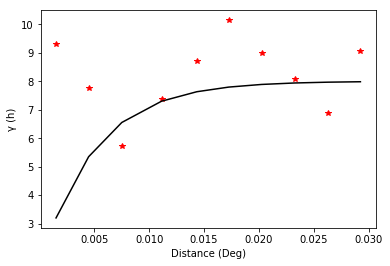

In [444]:
figt = plt.figure()
axt = figt.add_subplot(111)
axt.plot(OK.lags, OK.semivariance, 'r*')
axt.plot(OK.lags,OK.variogram_function(OK.variogram_model_parameters,OK.lags), 'k-')
plt.xlabel("Distance (Deg)")
plt.ylabel("\u03B3 (h)")
plt.savefig("semivariogram.png")
plt.show()

In [276]:
np.sin((dws[0][0]))

0.0006591751851186356

In [277]:
dws

[array([0.00065918, 0.00194963, 0.00326292, 0.00483733, 0.00623419,
        0.00750027, 0.00879935, 0.01010763, 0.01141844, 0.01271356])]

#### universal kriging

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 2.715789343662278
Full Sill: 8.360513083482374
Range: 4.775638192815483e-07
Nugget: 5.644723739820095 



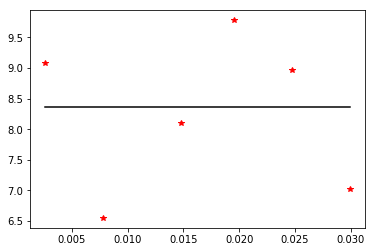

Calculating statistics on variogram model fit...
Q1 = 0.4881791108207835
Q2 = 0.8831187753601052
cR = 7.402419564006663 

Initializing drift terms...
Executing Universal Kriging...



In [47]:
UK = UniversalKriging(lats, long, rf_freqs, variogram_model='exponential',
                     verbose=True, enable_plotting=True)
zu, ssu = UK.execute('grid', lat_mesh_flat, long_mesh_flat)

In [422]:
minn = 0
maxx = -1000
for i in z2:
    tmpmin=min(i.data)
    if tmpmin < minn:
        minn=tmpmin
    tmpmax = max(i.data)
    if tmpmax > maxx:
        maxx=tmpmax

In [387]:
np.shape(z.data)

(900, 900)

In [423]:
print(minn)
print(maxx)
print(min(rf_freqs))
print(max(rf_freqs))

-67.78988822139338
-62.91400461281738
-86.7624022665
-59.068270098


In [44]:
ls = [-125.995354, -109.74596445615346, -105.88484194949307 -90.233002]

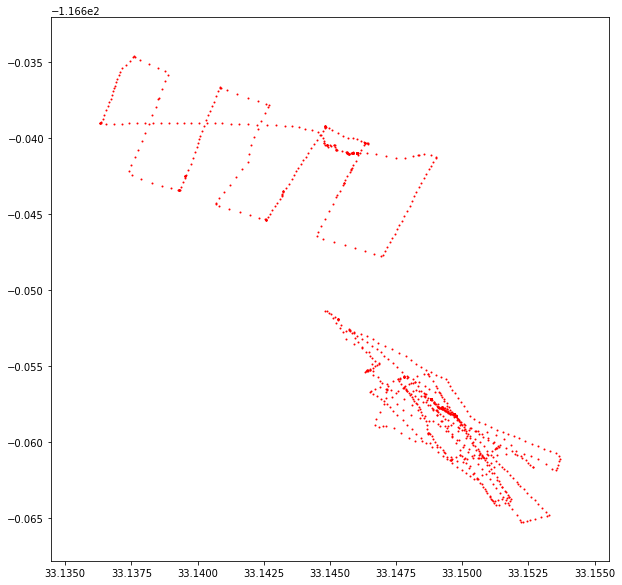

In [40]:
figdata = plt.figure(figsize=(10,10))  # create a figure object
ax = figdata.add_subplot(1, 1, 1)  # create an axes object in the figure
#ax.contour(lat_mesh, long_mesh, z.data, 10)
ax.scatter(lats,long, s=1, color="red")
#plt.xlim(minlat, maxlat)
#plt.ylim(-116.65, maxlong)
#figdata.savefig('test1.png', dpi=300)

In [393]:
#temp save
#Using 'exponential' Variogram Model
#Partial Sill: 6.359999999999999
#Full Sill: 8.36
#Range: 0.009
#Nugget: 2.0 
good1z = z



### ordinary kriging graph

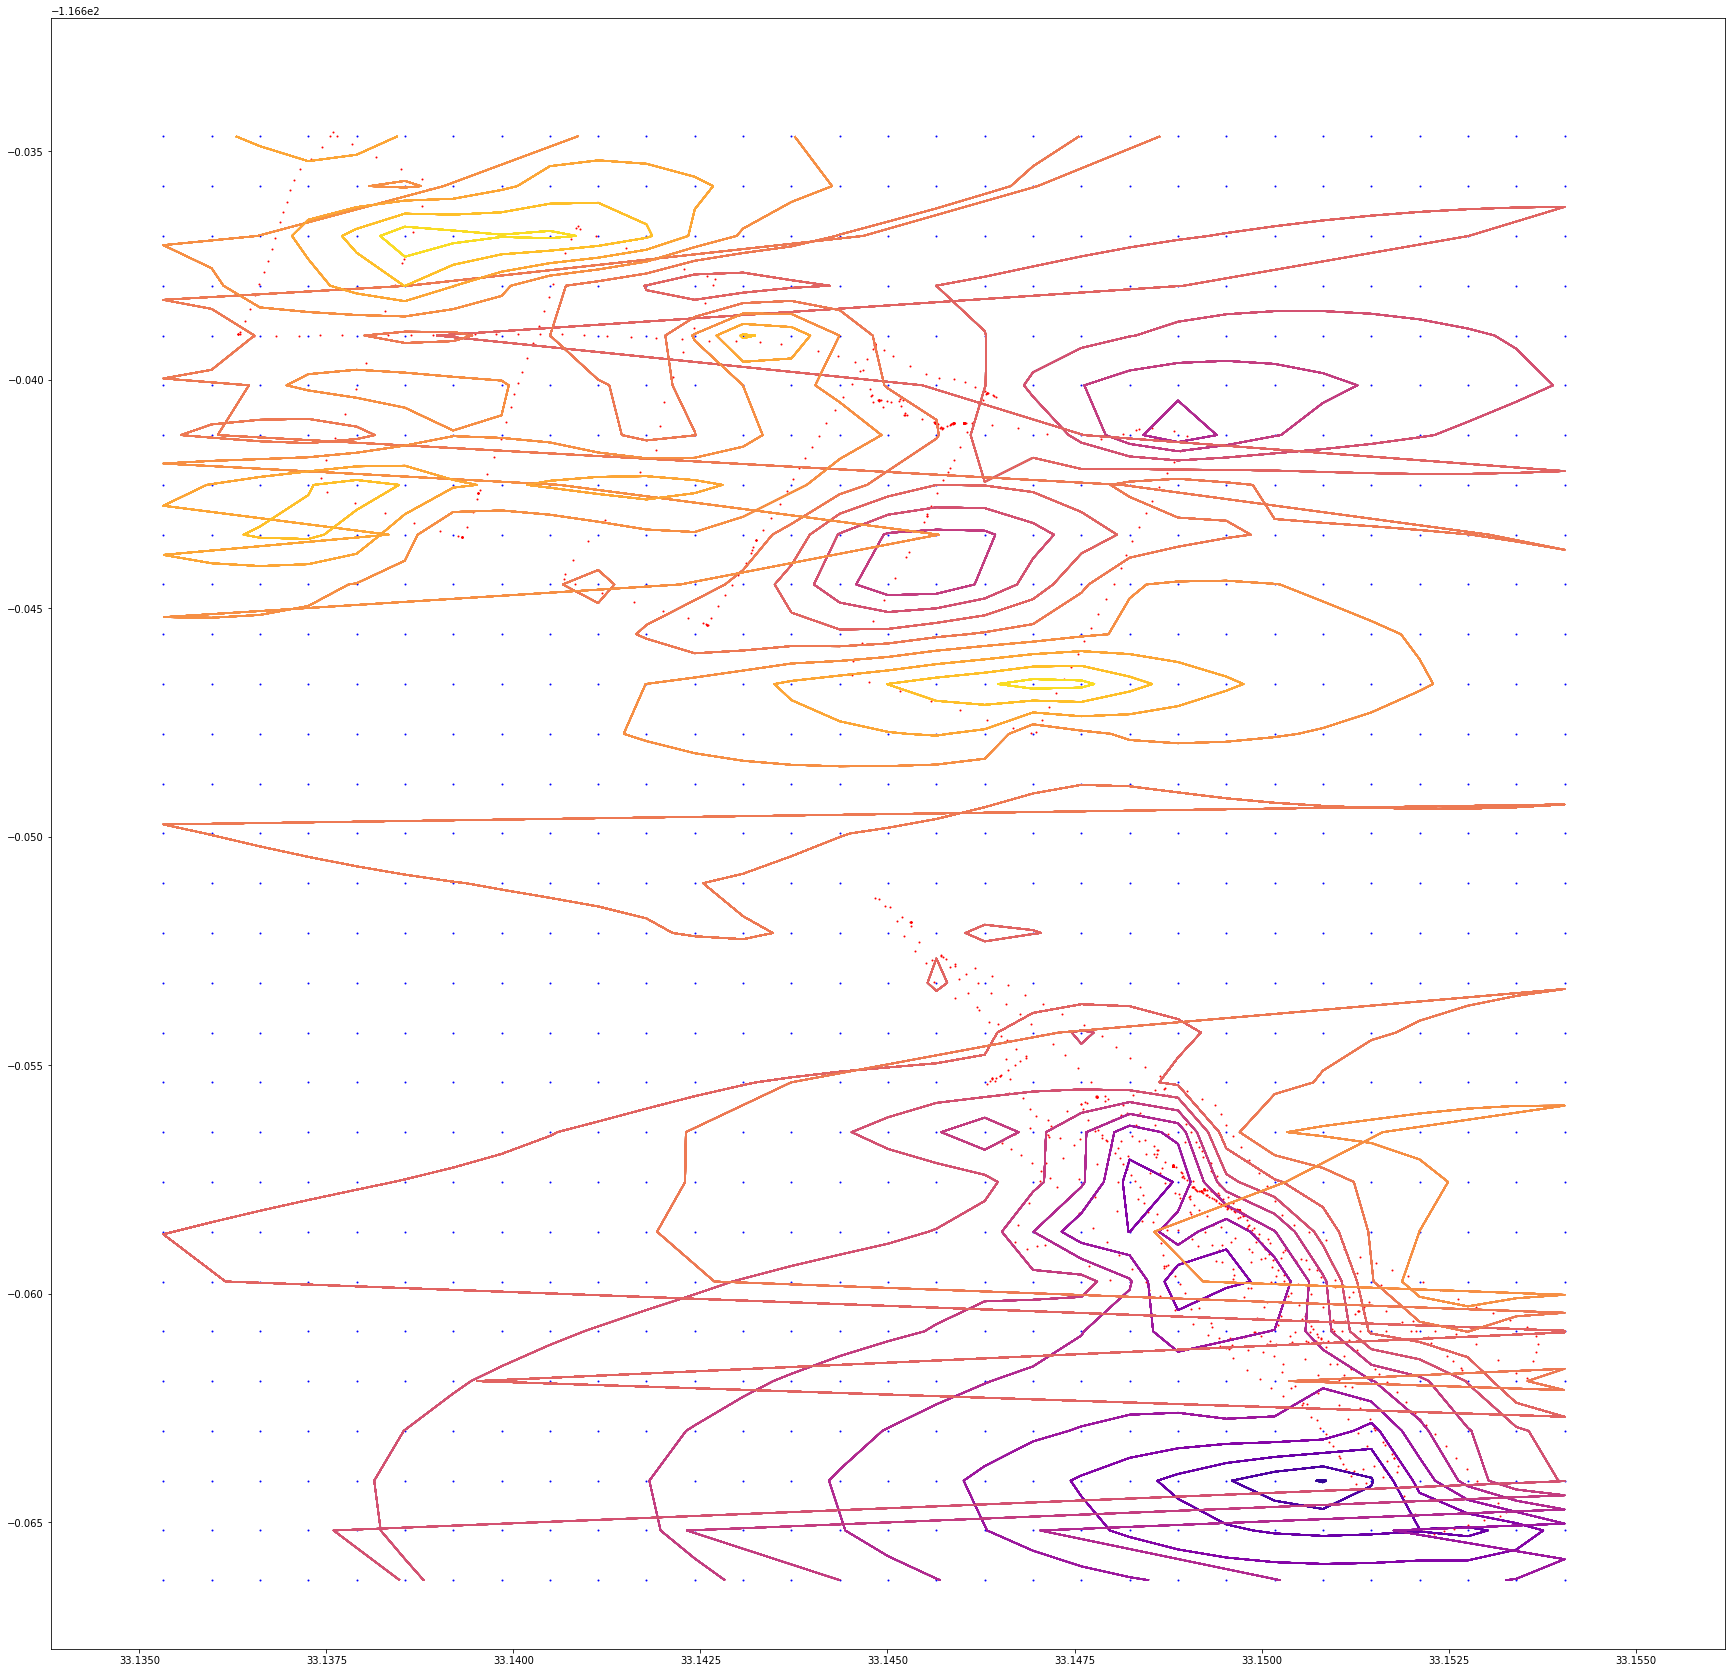

In [456]:
figdata0 = plt.figure(figsize=(30,30))  # create a figure object
ax0 = figdata0.add_subplot(1, 1, 1)
ax0.set_xlim([minlat-0.0025, maxlat+0.0025])
ax0.set_ylim([minlong-0.0025, maxlong+0.0025])
#ax0.contour(lat_mesh_flat,long_mesh_flat,z_abs, levels=15, corner_mask=True, cmap="gray")
ax0.contour(lat_mesh_flat,long_mesh_flat,good1z, levels=15, corner_mask=True, cmap="plasma")
ax0.scatter(lat_mesh_flat,long_mesh_flat, s=1, color="blue")
ax0.scatter(lats,long, s=1, color="red")

## len(lat_mesh_flat)


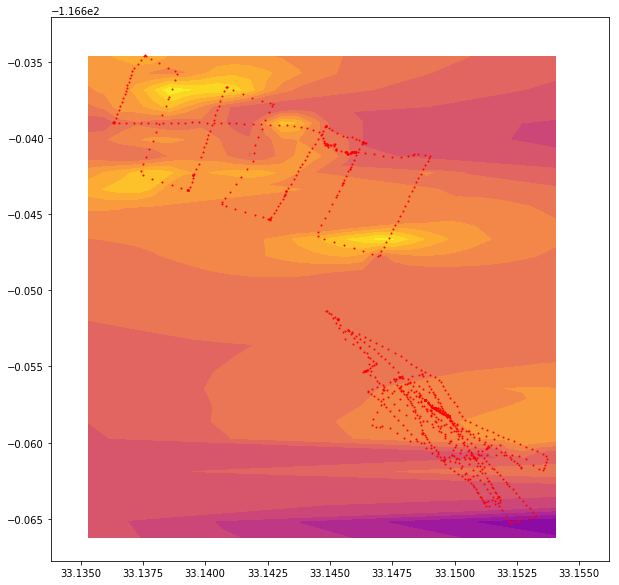

In [457]:
figdata1 = plt.figure(figsize=(10,10))  # create a figure object
ax1 = figdata1.add_subplot(1, 1, 1)
ax1.set_xlim([minlat-0.0025, maxlat+0.0025])
ax1.set_ylim([minlong-0.0025, maxlong+0.0025])
ax1.contourf(lat_mesh_flat,long_mesh_flat,z, levels=20, cmap='plasma')
#ax1.contour(lat_mesh_flat, long_mesh_flat, z, levels=10)
ax1.scatter(lats,long, s=1, color="red")
#ax1.pcolormesh(lat_mesh_flat,long_mesh_flat, z, cmap='plasma')



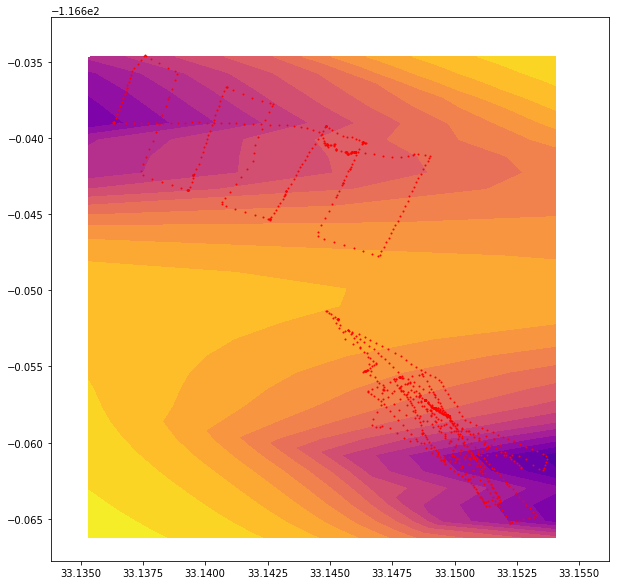

In [458]:
figdata2 = plt.figure(figsize=(10,10))  # create a figure object
ax2 = figdata2.add_subplot(1, 1, 1)
ax2.set_xlim([minlat-0.0025, maxlat+0.0025])
ax2.set_ylim([minlong-0.0025, maxlong+0.0025])
ax2.contourf(lat_mesh_flat,long_mesh_flat,ss, levels=20, cmap='plasma')
#ax1.contour(lat_mesh_flat, long_mesh_flat, z, levels=10)
ax2.scatter(lats,long, s=1, color="red")
#ax1.pcolormesh(lat_mesh_flat,long_mesh_flat, z, cmap='plasma')



In [461]:
ss

masked_array(
  data=[[8.977840425636197, 8.948180212062281, 8.91526751604966, ...,
         5.391835804742689, 5.5283225717877, 5.758256548742345],
        [8.977840425636197, 8.948180212062281, 8.91526751604966, ...,
         5.391835804742689, 5.5283225717877, 5.758256548742345],
        [8.977840425636197, 8.948180212062281, 8.91526751604966, ...,
         5.391835804742689, 5.5283225717877, 5.758256548742345],
        ...,
        [4.88558897165066, 4.265935378976997, 3.571613131682978, ...,
         8.5989495720166, 8.656641079159083, 8.709150446711277],
        [4.88558897165066, 4.265935378976997, 3.571613131682978, ...,
         8.5989495720166, 8.656641079159083, 8.709150446711277],
        [4.88558897165066, 4.265935378976997, 3.571613131682978, ...,
         8.5989495720166, 8.656641079159083, 8.709150446711277]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False,

### universal kriging graph

TypeError: Length of x must be number of columns in z.

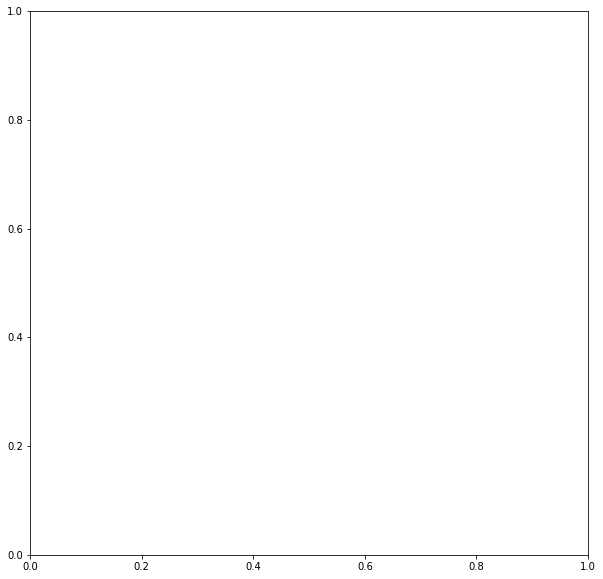

In [155]:
figdata1 = plt.figure(figsize=(10,10))  # create a figure object
ax1 = figdata1.add_subplot(1, 1, 1)
ax1.contour(lat_mesh_flat,long_mesh_flat,zu.data, levels=15)

(1081, 2)

# semivariogram 

In [33]:
ch_svg = skg.Variogram(coords, rf_freqs, estimator="cressie", model="exponential",
                      dist_func="euclidean", )


ValueError: Unknown Distance Metric: geographic

In [31]:
print(ch_svg)

exponential Variogram
---------------------
Estimator:         cressie
Effective Range:   0.00
Sill:              79.45
Nugget:            0.00
        


# kriging param opt 

In [80]:
# 2D Kring param opt

param_dict = {"method": ["ordinary", "universal"],
              "variogram_model": ["linear", "power", "gaussian", "spherical"],
               "nlags": [4, 6, 8],
              # "weight": [True, False]
              }

estimator = GridSearchCV(Krige(), param_dict, verbose=True)

# dummy data
#X = np.random.randint(0, 400, size=(100, 2)).astype(float)
#y = 5 * np.random.rand(100)

# run the gridsearch
estimator.fit(coords, y=np.array(rf_freqs))


if hasattr(estimator, 'best_score_'):
    print('best_score R² = {:.3f}'.format(estimator.best_score_))
    print('best_params = ', estimator.best_params_)

print('\nCV results::')
if hasattr(estimator, 'cv_results_'):
    for key in ['mean_test_score', 'mean_train_score',
                'param_method', 'param_variogram_model']:
        print(' - {} : {}'.format(key, estimator.cv_results_[key]))

# 3D Kring param opt

param_dict3d = {"method": ["ordinary3d"],
              "variogram_model": ["linear", "power", "gaussian", "spherical"],
              "nlags": [4, 6, 8],
              # "weight": [True, False]
              }

estimator = GridSearchCV(Krige(), param_dict3d, verbose=True)

# dummy data
X3 = np.random.randint(0, 400, size=(100, 3)).astype(float)
y = 5 * np.random.rand(100)

# run the gridsearch
estimator.fit(X=coords, y=y)


if hasattr(estimator, 'best_score_'):
    print('best_score R² = {:.3f}'.format(estimator.best_score_))
    print('best_params = ', estimator.best_params_)

print('\nCV results::')
if hasattr(estimator, 'cv_results_'):
    for key in ['mean_test_score', 'mean_train_score',
                'param_method', 'param_variogram_model']:
        print(' - {} : {}'.format(key, estimator.cv_results_[key]))

NameError: name 'coords' is not defined

# empirical cdf

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  


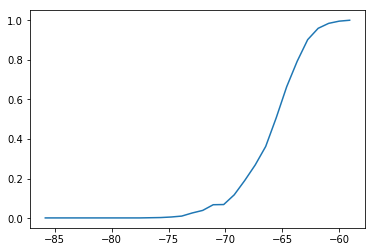

In [22]:
num_bins = 30
counts, bin_edges = np.histogram (rf_freqs, bins=num_bins, normed=False)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

In [23]:
for q in [50, 90, 95, 100]:
  print ("{}%% percentile: {}".format (q, np.percentile(rf_freqs, q)))

50%% percentile: -65.569461316
90%% percentile: -62.786619852
95%% percentile: -61.995500446
100%% percentile: -59.068270098
